# Proyek Akhir Analis Data : Bike Sharing dataset

Nama  : Akmal Fauzan Restu Agung

Email : aafauzan52@gmail.com

## Menentukan pertanyaan bisnis

### Pertanyaan 1
Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda harian secara keseluruhan, dan bagaimana kondisi cuaca serta waktu mempengaruhi pola penyewaan?

### Pertanyaan 2
Bagaimana dampak cuaca terhadap pola penyewaan sepeda secara jam per jam?

# Import library yang akan di gunakan

In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Wrangling

### Gathering Data

#### Import dan baca dataset

In [343]:
day = pd.read_csv('./data/day.csv')
hour = pd.read_csv('./data/hour.csv')

#### Preview Dataframe pada 5 data pertama

In [344]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [345]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assesing Data

#### Penilaian pada data day

In [346]:
day.shape

(731, 16)

In [347]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Cek data kosong / null

In [348]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### cek apakah ada data duplikat

In [349]:
day.duplicated().sum()

0

##### cek distribusi nilai statistik

In [350]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Penilaian pada data Hour

In [351]:
hour.shape

(17379, 17)

In [352]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Cek data kosong / null

In [353]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### cek apakah ada data duplikat

In [354]:
day.duplicated().sum()

0

##### cek distribusi nilai statistik

In [355]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Cleaning data

### Ubah tipe data kolom dteday pada data day

In [356]:
day['dteday'] = pd.to_datetime(day['dteday'])

In [357]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Ubah tipe data kolom dteday pada data hour

In [358]:
hour['dteday'] = pd.to_datetime(hour['dteday'])

In [359]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

### Menghapus kolom yang tidak akan di gunakan dalam analisis

In [360]:
dropColDay = ['instant']
day.drop(columns=dropColDay, inplace=True)

In [361]:
dropColHour = ['instant']
hour.drop(columns=dropColHour, inplace=True)

## Exploratory Data Analyst

### Terdapat beberapa pertanyaan yang akan di eksplor pada EDA 

Di antaranya adalah sebagai berikut :

1. Bagaimana pengaruh suhu (temp) dan kelembapan (hum) terhadap jumlah penyewaan sepeda harian?
2. Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda pada hari kerja dan hari libur?
3. Bagaimana distribusi penyewaan sepeda menurut musim (season)?
4. Bagaimana jumlah penyewaan sepeda bervariasi pada kondisi cuaca berbeda (weathersit)?
5. Apakah ada pola tertentu pada jam-jam tertentu dalam sehari terkait dengan kondisi cuaca?
6. Apakah ada korelasi antara kondisi cuaca (suhu, kelembapan, kecepatan angin) dan waktu (hari kerja, hari dalam seminggu, musim) dengan jumlah penyewaan sepeda secara keseluruhan?

#### Menjawab pertanyaan 1

1. Bagaimana pengaruh suhu (temp) dan kelembapan (hum) terhadap jumlah penyewaan sepeda harian?

In [362]:
day[['temp', 'hum', 'cnt']].describe()

,temp,hum,cnt
count,731.000000,731.000000,731.000000
mean,0.495385,0.627894,4504.348837
std,0.183051,0.142429,1937.211452
min,0.059130,0.000000,22.000000
25%,0.337083,0.520000,3152.000000
50%,0.498333,0.626667,4548.000000
75%,0.655417,0.730209,5956.000000
max,0.861667,0.972500,8714.000000


In [363]:
correlation_matrix = day[['temp', 'hum', 'cnt']].corr()

print("Matriks Korelasi antara Suhu, Kelembapan, dan Jumlah Penyewaan:")
correlation_matrix

Matriks Korelasi antara Suhu, Kelembapan, dan Jumlah Penyewaan:


,temp,hum,cnt
temp,1.000000,0.126963,0.627494
hum,0.126963,1.000000,-0.100659
cnt,0.627494,-0.100659,1.000000


In [364]:
temp_bins = [day['temp'].min(), day['temp'].quantile(0.25), day['temp'].quantile(0.75), day['temp'].max()]
temp_labels = ['Dingin', 'Sedang', 'Panas']

In [365]:
# Membuat kolom kategori untuk suhu
day['temp_category'] = pd.cut(day['temp'], bins=temp_bins, labels=temp_labels, include_lowest=True)

In [366]:
day[['temp', 'temp_category']].sample(5)

,temp,temp_category
558,0.715833,Panas
180,0.696667,Panas
430,0.258333,Dingin
249,0.599167,Sedang
54,0.295652,Dingin


In [367]:
hum_bins = [day['hum'].min(), day['hum'].quantile(0.25), day['hum'].quantile(0.75), day['hum'].max()]
hum_labels = ['Rendah', 'Sedang', 'Tinggi']

In [368]:
day['hum_category'] = pd.cut(day['hum'], bins=hum_bins, labels=hum_labels, include_lowest=True)

In [369]:
day[['hum', 'hum_category']].sample(6)

,hum,hum_category
336,0.612917,Sedang
19,0.538333,Sedang
675,0.567083,Sedang
302,0.623750,Sedang
162,0.747917,Tinggi
516,0.492917,Rendah


In [370]:
pivotTemp = day.pivot_table(values='cnt', index='temp_category', aggfunc='mean')
pivotTemp

C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_32092\2176274747.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivotTemp = day.pivot_table(values='cnt', index='temp_category', aggfunc='mean')


,cnt
temp_category,
Dingin,2615.076503
Sedang,4886.912329
Panas,5630.584699


In [371]:
pivotHum = day.pivot_table(values='cnt', index='hum_category', aggfunc=['mean', 'min', 'max', 'sum'])
pivotHum

C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_32092\2982630311.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivotHum = day.pivot_table(values='cnt', index='hum_category', aggfunc=['mean', 'min', 'max', 'sum'])
C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_32092\2982630311.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivotHum = day.pivot_table(values='cnt', index='hum_category', aggfunc=['mean', 'min', 'max', 'sum'])
C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_32092\2982630311.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to

,mean,min,max,sum
,cnt,cnt,cnt,cnt
hum_category,,,,
Rendah,4377.809783,623,8714,805517
Sedang,4882.637363,431,8555,1777280
Tinggi,3879.136612,22,7836,709882


Berdasarkan hasil analisis, suhu memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda harian. Dari data, terlihat bahwa saat suhu berada di kategori dingin, rata-rata penyewaan sepeda adalah 2615 per hari. Jumlah ini meningkat pada suhu sedang, dengan rata-rata penyewaan mencapai 4886 sepeda per hari, dan tertinggi pada suhu panas, dengan rata-rata 5630 penyewaan per hari. Selain itu, kelembapan juga dianalisis, di mana pada kelembapan rendah, rata-rata penyewaan sepeda adalah 4377 per hari, dan pada kelembapan tinggi, penyewaan cenderung turun menjadi 3879 per hari. Meskipun kelembapan menunjukkan korelasi negatif lemah terhadap penyewaan, suhu memiliki korelasi yang lebih kuat dan positif.

Sebagai kesimpulan, suhu terbukti menjadi faktor utama yang mempengaruhi jumlah penyewaan sepeda harian. Semakin tinggi suhu, semakin tinggi pula jumlah penyewaan sepeda. Sebaliknya, kelembapan hanya memiliki dampak kecil terhadap penyewaan, di mana kelembapan tinggi sedikit menurunkan jumlah penyewaan. Oleh karena itu, dapat disimpulkan bahwa cuaca hangat mendorong lebih banyak orang untuk menyewa sepeda, sementara kelembapan tinggi cenderung mengurangi minat penyewaan, meskipun efeknya tidak sebesar perubahan suhu.

#### Menjawab pertanyaan 2

2. Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda pada hari kerja dan hari libur?

In [372]:
day['workingdayDesc'] = day['workingday'].map({
    0: 'Holiday',   
    1: 'Working Day'
})

In [373]:
summaryWork = day.groupby('workingdayDesc').agg({
    'cnt': 'sum',
    'registered': 'sum',
    'casual': 'sum'
}).reset_index()

In [374]:
summaryWork

,workingdayDesc,cnt,registered,casual
0,Holiday,1000269,683537,316732
1,Working Day,2292410,1989125,303285


In [375]:
pivotWorking = day.pivot_table(values='cnt', index='workingdayDesc', aggfunc=['mean', 'min', 'max', 'sum'])
pivotWorking

,mean,min,max,sum
,cnt,cnt,cnt,cnt
workingdayDesc,,,,
Holiday,4330.168831,605,8714,1000269
Working Day,4584.820000,22,8362,2292410


Berdasarkan hasil analisis, pada hari kerja jumlah total penyewaan sepeda mencapai 2,294,410, dengan sebagian besar penyewaan berasal dari pengguna terdaftar sebanyak 1,989,125 dan 303,285 dari pengguna kasual. Pada hari libur, jumlah total penyewaan adalah 1,000,269, dengan 683,537 berasal dari pengguna terdaftar dan 316,732 dari pengguna kasual. Rata-rata penyewaan sepeda per hari adalah 4,584 sepeda pada hari kerja dan 4,330 sepeda pada hari libur, dengan rentang penyewaan antara 22 hingga 8714 sepeda per hari pada hari kerja, dan antara 655 hingga 8714 pada hari libur.

Kesimpulannya, meskipun total penyewaan sepeda jauh lebih tinggi pada hari kerja dibandingkan hari libur, rata-rata penyewaan per harinya tidak menunjukkan perbedaan yang signifikan. Hal ini menunjukkan bahwa pada hari kerja, penggunaan sepeda lebih sering terkait dengan keperluan harian seperti bekerja, namun minat untuk menyewa sepeda tetap tinggi pada hari libur, yang mungkin lebih banyak digunakan untuk rekreasi atau aktivitas santai.

#### Menjawab pertanyaan 3

3. Bagaimana distribusi penyewaan sepeda menurut musim (season)?

In [376]:
day['seasonDesc'] = day['season'].map({
    1 : "musim semi",
    2 : "musim panas",
    3 : "musin gugur",
    4 : "musim dingin"

})

In [377]:
summarySeason = day.groupby('seasonDesc').agg({
    'cnt': 'sum',
    'registered': 'sum',
    'casual': 'sum'
}).reset_index()

In [378]:
summarySeason

,seasonDesc,cnt,registered,casual
0,musim dingin,841613,711831,129782
1,musim panas,918589,715067,203522
2,musim semi,471348,410726,60622
3,musin gugur,1061129,835038,226091


In [379]:
pivotSeason = day.pivot_table(values='cnt', index='seasonDesc', aggfunc=['mean', 'min', 'max', 'sum'])
pivotSeason

,mean,min,max,sum
,cnt,cnt,cnt,cnt
seasonDesc,,,,
musim dingin,4728.162921,22,8555,841613
musim panas,4992.331522,795,8362,918589
musim semi,2604.132597,431,7836,471348
musin gugur,5644.303191,1115,8714,1061129


Berdasarkan analisis data, jumlah penyewaan sepeda tertinggi terjadi pada musim gugur, dengan total 1,061,129 penyewaan, dan rata-rata penyewaan harian mencapai 5,644 sepeda. Musim panas juga menunjukkan penyewaan yang tinggi, dengan total 918,589 penyewaan dan rata-rata 4,992 sepeda per hari. Musim dingin, meskipun cuacanya lebih ekstrem, memiliki total 841,613 penyewaan dengan rata-rata 4,728 sepeda per hari. Di sisi lain, musim semi memiliki jumlah penyewaan terendah, dengan total 471,348 sepeda dan rata-rata 2,604 penyewaan per hari. Hal ini menunjukkan bahwa musim dengan suhu lebih hangat (gugur dan panas) cenderung meningkatkan penyewaan sepeda.

Kesimpulannya, distribusi penyewaan sepeda sangat dipengaruhi oleh musim. Penyewaan sepeda mencapai puncaknya di musim gugur, diikuti oleh musim panas, sementara penyewaan terendah terjadi di musim semi. Musim panas dan gugur mendukung aktivitas luar ruangan yang lebih banyak, termasuk penyewaan sepeda, sedangkan musim semi, meskipun lebih ringan daripada musim dingin, masih memiliki suhu yang lebih rendah dan mengurangi minat untuk menyewa sepeda.

#### Menjawab pertanyaan 4

4. Bagaimana jumlah penyewaan sepeda bervariasi pada kondisi cuaca berbeda (weathersit)?

In [380]:
day['weathersitDesc'] =  day['weathersit'].map({
    1 : "Cerah",
    2 : "Berkabut",
    3 : "Hujan/salju ringan",
    4 : "Hujan/badai deras"
})

In [381]:
hour['weathersitDesc'] =  hour['weathersit'].map({
    1 : "Cerah",
    2 : "Berkabut",
    3 : "Hujan/salju ringan",
    4 : "Hujan/badai deras"
})

In [382]:
summaryWeather = day.groupby('weathersitDesc').agg({
    'cnt': 'sum',
    'registered': 'sum',
    'casual': 'sum'
}).reset_index()

In [383]:
summaryWeather

,weathersitDesc,cnt,registered,casual
0,Berkabut,996858,827082,169776
1,Cerah,2257952,1811606,446346
2,Hujan/salju ringan,37869,33974,3895


In [384]:
pivotWeather = day.pivot_table(values='cnt', index='weathersitDesc', aggfunc=['mean', 'min', 'max', 'sum'])
pivotWeather

,mean,min,max,sum
,cnt,cnt,cnt,cnt
weathersitDesc,,,,
Berkabut,4035.862348,605,8362,996858
Cerah,4876.786177,431,8714,2257952
Hujan/salju ringan,1803.285714,22,4639,37869


Berdasarkan analisis data, penyewaan sepeda tertinggi terjadi pada hari cerah, dengan total penyewaan mencapai 2,257,952 sepeda. Dari jumlah tersebut, 1,811,606 berasal dari pengguna terdaftar dan 446,346 dari pengguna kasual. Pada hari berkabut, penyewaan turun menjadi 996,858 sepeda, dengan mayoritas penyewaan berasal dari pengguna terdaftar (827,082) dan 169,776 dari pengguna kasual. Cuaca yang lebih ekstrem seperti hujan atau salju ringan menunjukkan penurunan signifikan dalam penyewaan, dengan hanya 37,869 sepeda yang disewa pada hari-hari tersebut. Rata-rata penyewaan per hari tertinggi pada kondisi cerah, yaitu 4,786 sepeda, sementara pada hari berkabut mencapai 4,035 sepeda. Pada kondisi hujan atau salju ringan, rata-rata penyewaan menurun drastis menjadi 1,803 sepeda per hari.

Kesimpulannya, kondisi cuaca sangat mempengaruhi jumlah penyewaan sepeda. Hari-hari dengan cuaca cerah memberikan penyewaan tertinggi, baik untuk pengguna terdaftar maupun kasual. Cuaca berkabut masih memungkinkan jumlah penyewaan yang signifikan, meskipun lebih rendah dibandingkan cuaca cerah. Namun, kondisi cuaca yang buruk seperti hujan atau salju ringan secara drastis mengurangi jumlah penyewaan, menunjukkan bahwa penyewaan sepeda sangat bergantung pada cuaca yang baik.

#### Menjawab pertanyaan 5

5. Apakah ada pola tertentu pada jam-jam tertentu dalam sehari terkait dengan kondisi cuaca?

In [385]:
hour['hr'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [386]:
def waktu(hr):
    if 1 <= hr <= 4:
        return "dini hari"
    elif 5 <= hr <= 10:
        return "pagi"
    elif 11 <= hr <= 14:
        return "siang"
    elif 15 <= hr <= 18:
        return "sore"
    else:
        return "malam"

In [387]:
hour['waktu'] = hour['hr'].apply(waktu)

In [388]:
summaryHour = hour.groupby('waktu').agg({
    'cnt': 'sum',
    'registered': 'sum',
    'casual': 'sum'
}).reset_index()

In [389]:
summaryHour

,waktu,cnt,registered,casual
0,dini hari,53118,42230,10888
1,malam,715467,598374,117093
2,pagi,770260,686186,84074
3,siang,696305,495499,200806
4,sore,1057529,850373,207156


In [390]:
pivotHour = hour.pivot_table(values='cnt', index='waktu', aggfunc=['mean', 'min', 'max', 'sum'])
pivotHour

,mean,min,max,sum
,cnt,cnt,cnt,cnt
waktu,,,,
dini hari,18.749735,1,168,53118
malam,163.872423,2,743,715467
pagi,177.071264,1,839,770260
siang,239.033642,3,776,696305
sore,362.539938,7,977,1057529


Berdasarkan analisis data, penyewaan sepeda tertinggi terjadi pada sore hari, dengan total penyewaan mencapai 1,057,529 sepeda, di mana 850,373 berasal dari pengguna terdaftar dan 207,156 dari pengguna kasual. Pagi hari juga memiliki jumlah penyewaan yang signifikan, dengan total 770,260 sepeda, yang mayoritas berasal dari pengguna terdaftar (686,186). Siang hari mencatat total 696,305 penyewaan, sementara malam hari menunjukkan angka penyewaan sebesar 715,467. Penyewaan terendah terjadi pada dini hari, dengan total hanya 53,118 sepeda. Rata-rata penyewaan per hari tertinggi juga terjadi pada sore hari, dengan 362 sepeda per hari, diikuti pagi dan siang hari, sedangkan dini hari memiliki rata-rata terendah dengan hanya 18 sepeda per hari.

Kesimpulannya, ada pola penyewaan sepeda yang jelas terkait dengan waktu dalam sehari. Sore hari menjadi waktu paling sibuk untuk penyewaan sepeda, yang kemungkinan besar dipengaruhi oleh aktivitas pulang kerja atau rekreasi. Pagi hari juga menunjukkan pola komuter yang kuat dengan jumlah penyewaan yang tinggi. Sementara itu, penyewaan sepeda menurun secara signifikan pada dini hari, menunjukkan bahwa sepeda kurang digunakan pada waktu tersebut, yang diharapkan mengingat jam-jam tersebut bukanlah jam sibuk bagi kebanyakan orang.

#### Menjawab pertanyaan 6

6. Apakah ada korelasi antara kondisi cuaca (suhu, kelembapan, kecepatan angin) dan waktu (hari kerja, hari dalam seminggu, musim) dengan jumlah penyewaan sepeda secara keseluruhan?

In [391]:
casual = day[['temp', 'hum', 'windspeed', 'weathersit', 'season', 'workingday', 'weekday', 'casual', 'registered', 'cnt']]

In [392]:
correlation = casual.corr()
correlationCnt = correlation['cnt'].drop('cnt')
correlationCnt

temp          0.627494
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
season        0.406100
workingday    0.061156
weekday       0.067443
casual        0.672804
registered    0.945517
Name: cnt, dtype: float64

Berdasarkan hasil analisis korelasi, suhu memiliki korelasi positif yang kuat terhadap jumlah penyewaan sepeda, dengan nilai korelasi sebesar 0.627. Ini menunjukkan bahwa semakin tinggi suhu, semakin banyak sepeda yang disewa. Kelembapan, di sisi lain, memiliki korelasi negatif yang lemah (-0.100), yang mengindikasikan bahwa pengaruh kelembapan terhadap penyewaan sepeda tidak signifikan. Kecepatan angin memiliki korelasi negatif (-0.234), menunjukkan bahwa angin yang lebih kencang cenderung mengurangi minat masyarakat untuk menyewa sepeda. Kondisi cuaca (weathersit) juga berpengaruh dengan korelasi negatif (-0.297), yang berarti cuaca buruk, seperti hujan atau kabut, dapat menurunkan jumlah penyewaan sepeda. Selain itu, musim memiliki korelasi positif (0.406), yang menunjukkan bahwa musim tertentu, seperti musim panas dan gugur, lebih mendorong penyewaan sepeda dibandingkan musim dingin.

Kesimpulannya, terdapat korelasi yang cukup kuat antara variabel cuaca (seperti suhu, kecepatan angin, dan kondisi cuaca) serta faktor waktu (musim dan hari kerja) dengan jumlah penyewaan sepeda secara keseluruhan. Cuaca yang lebih hangat, cuaca cerah, dan musim panas atau gugur secara signifikan meningkatkan jumlah penyewaan sepeda, sedangkan cuaca buruk, kecepatan angin tinggi, dan suhu yang lebih dingin mengurangi penyewaan sepeda.

In [393]:
features = day[['temp', 'hum', 'windspeed', 'weathersit', 'season', 'workingday', 'cnt']]

In [394]:
scaler = StandardScaler()
features[['temp', 'hum', 'windspeed']] = scaler.fit_transform(features[['temp', 'hum', 'windspeed']])

C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_32092\1457287248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[['temp', 'hum', 'windspeed']] = scaler.fit_transform(features[['temp', 'hum', 'windspeed']])


In [395]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(features[['temp', 'hum', 'windspeed', 'weathersit', 'season', 'workingday', 'cnt']])

In [396]:
day['cluster'] = clusters

In [397]:
day[day['cluster'] == 0].head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,windspeed,casual,registered,cnt,temp_category,hum_category,workingdayDesc,seasonDesc,weathersitDesc,cluster
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,0.160446,331,654,985,Sedang,Tinggi,Holiday,musim semi,Berkabut,0
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,...,0.248539,131,670,801,Sedang,Sedang,Holiday,musim semi,Berkabut,0
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,...,0.248309,120,1229,1349,Dingin,Rendah,Working Day,musim semi,Cerah,0
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,...,0.160296,108,1454,1562,Dingin,Sedang,Working Day,musim semi,Cerah,0
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,...,0.186900,82,1518,1600,Dingin,Rendah,Working Day,musim semi,Cerah,0


In [398]:
day[day['cluster'] == 1].head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,windspeed,casual,registered,cnt,temp_category,hum_category,workingdayDesc,seasonDesc,weathersitDesc,cluster
118,2011-04-29,2,0,4,0,5,1,1,0.510000,0.497463,...,0.240063,878,3717,4595,Sedang,Rendah,Working Day,musim panas,Cerah,1
119,2011-04-30,2,0,4,0,6,0,1,0.472500,0.464021,...,0.235075,1965,3347,5312,Sedang,Rendah,Holiday,musim panas,Cerah,1
122,2011-05-03,2,0,5,0,2,1,2,0.616667,0.582079,...,0.342667,603,3848,4451,Sedang,Sedang,Working Day,musim panas,Berkabut,1
124,2011-05-05,2,0,5,0,4,1,1,0.459167,0.441917,...,0.295392,614,3819,4433,Sedang,Rendah,Working Day,musim panas,Cerah,1
125,2011-05-06,2,0,5,0,5,1,1,0.479167,0.474117,...,0.228246,894,3714,4608,Sedang,Sedang,Working Day,musim panas,Cerah,1


In [399]:
day['insight'] = day['cluster'].map({
    0 : "Penurunan sewa",
    1 : "Kenaikan sewa",
})

**Kesimpulan dari pola cluster** 

Penurunan penyewaan (Kluster 0) : Penurunan penyewaan terjadi pada hari-hari dengan suhu lebih dingin, kelembapan yang lebih tinggi, kecepatan angin yang lebih tinggi, dan kondisi cuaca yang kurang baik (berkabut atau berawan). Selain itu, musim semi tampaknya lebih berhubungan dengan penurunan penyewaan sepeda, meskipun ada cukup banyak hari kerja.

Kenaikan penyewaan (Kluster 1): Kenaikan penyewaan sepeda terjadi pada hari-hari dengan suhu lebih hangat, kelembapan lebih rendah, dan kecepatan angin lebih rendah. Penyewaan sepeda cenderung lebih tinggi pada musim panas dan gugur, dengan kondisi cuaca yang cerah mendukung aktivitas luar ruangan.

In [400]:
day.to_csv('./data/dayNew.csv', index=False)
hour.to_csv('./data/hourNew.csv', index=False)

## Visualization & Explanatory Analysis

#### Menjawab pertanyaan Bisnis 1

Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda harian secara keseluruhan, dan bagaimana kondisi cuaca serta waktu mempengaruhi pola penyewaan?

Jawaban dari pertanyaan ini dapat diambil dari hasil proses EDA pada sesi sebelumnya, yaitu pada pertanyaan EDA ke 1, 2, 3, 4, dan 6. Berikut adalah bentuk visualisasi datanya

##### Visualisasi EDA pertanyaan 1

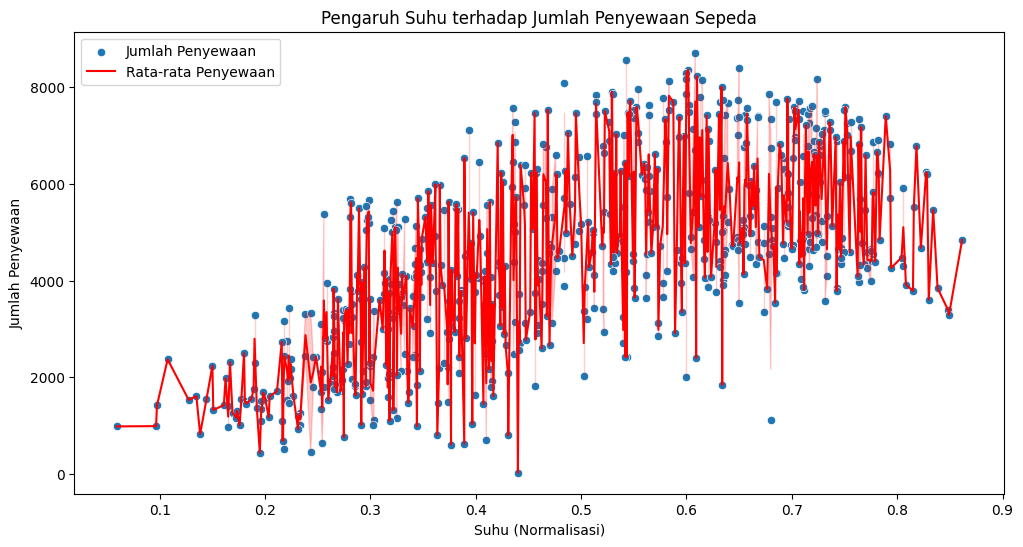

In [401]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=day, x='temp', y='cnt', label='Jumlah Penyewaan')
sns.lineplot(data=day, x='temp', y='cnt', estimator='mean', color='red', label='Rata-rata Penyewaan')
plt.title('Pengaruh Suhu terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Penyewaan')
plt.legend()
plt.show()

C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_32092\3892662294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day, x='hum_category', y='cnt', palette='viridis')


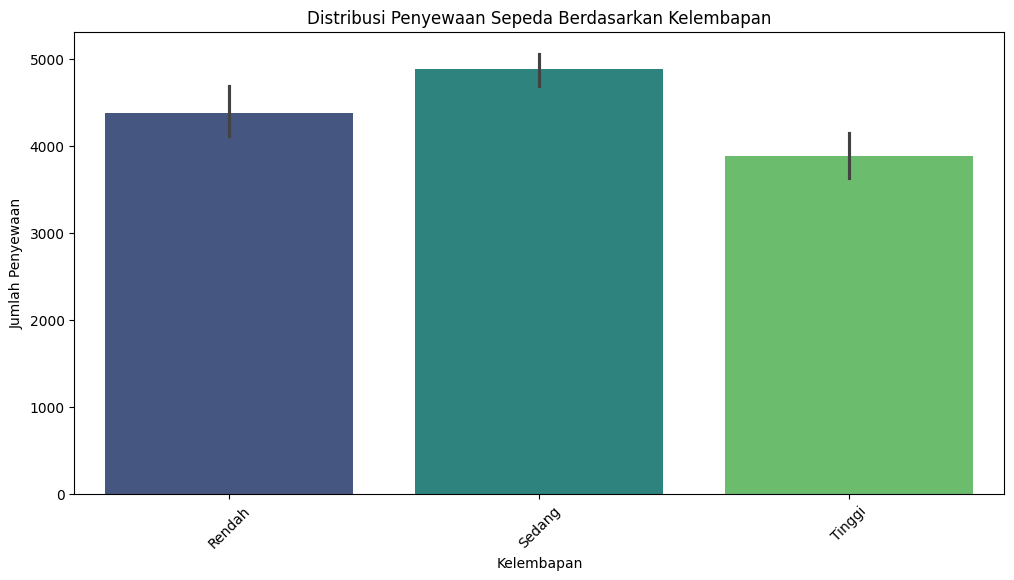

In [402]:
plt.figure(figsize=(12, 6))
sns.barplot(data=day, x='hum_category', y='cnt', palette='viridis')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Kelembapan')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45) 
plt.show()

C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_32092\788951139.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day, x='temp_category', y='cnt', palette='viridis')


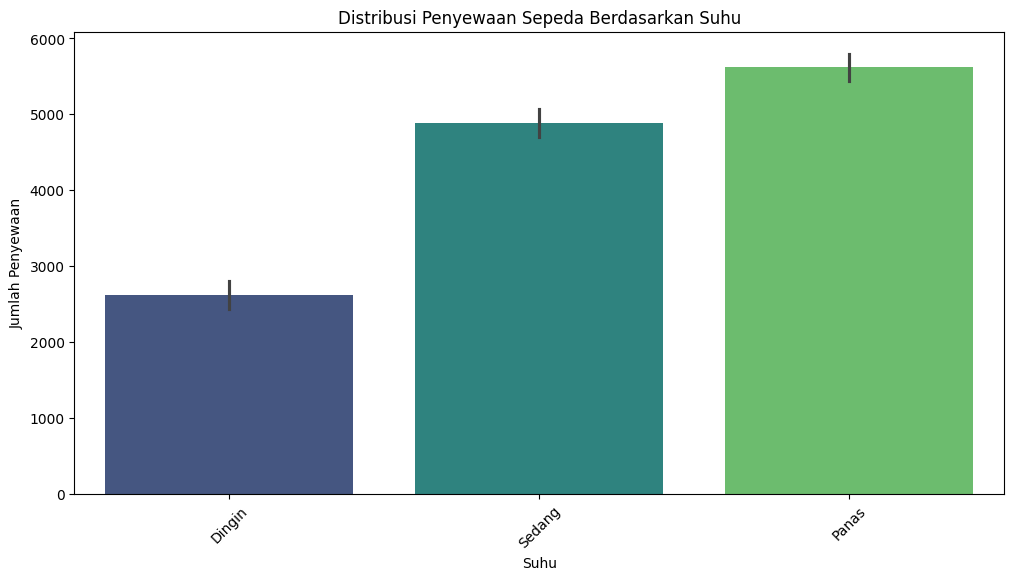

In [403]:
plt.figure(figsize=(12, 6))
sns.barplot(data=day, x='temp_category', y='cnt', palette='viridis')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Suhu')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45) 
plt.show()

##### Visualisasi EDA pertanyaan 2

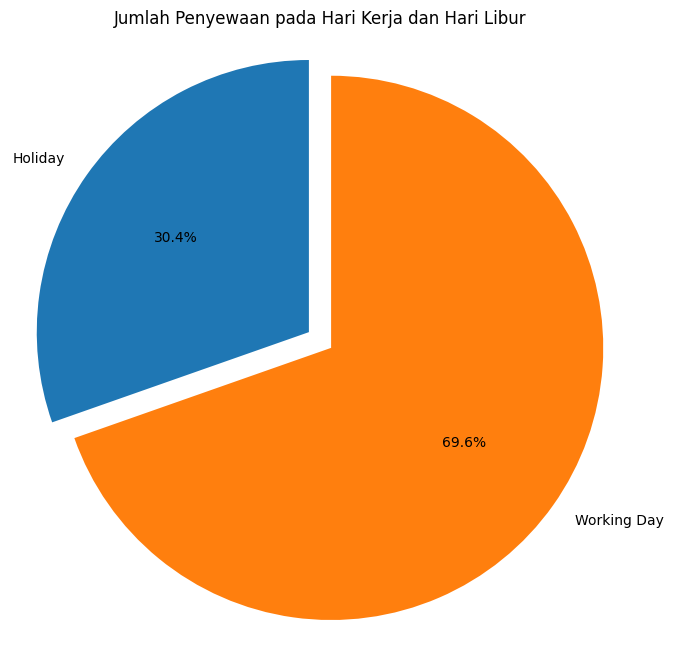

In [404]:
plt.figure(figsize=(8, 8))
plt.pie(summaryWork['cnt'], labels=summaryWork['workingdayDesc'], autopct='%1.1f%%', startangle=90, explode=[0.1, 0.0])
plt.title('Jumlah Penyewaan pada Hari Kerja dan Hari Libur')
plt.axis('equal')  
plt.show()

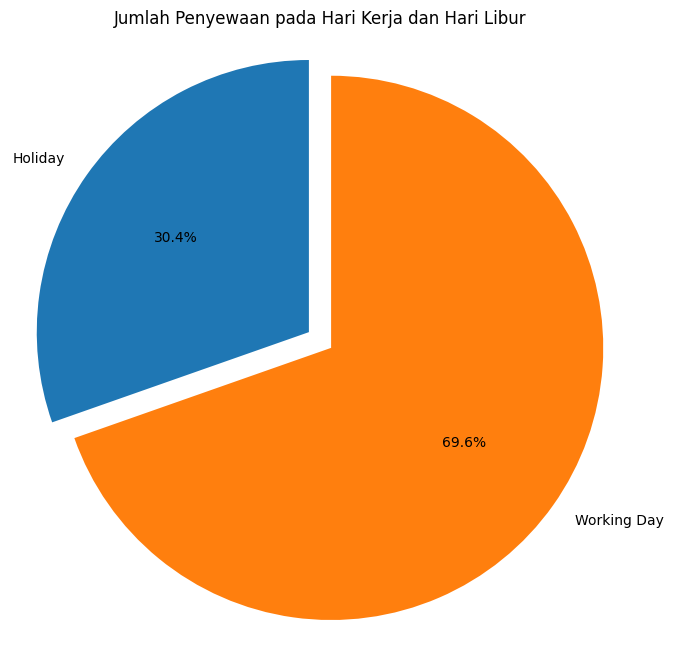

In [405]:
plt.figure(figsize=(8, 8))
plt.pie(summaryWork['cnt'], labels=summaryWork['workingdayDesc'], autopct='%1.1f%%', startangle=90, explode=[0.1, 0.0])
plt.title('Jumlah Penyewaan pada Hari Kerja dan Hari Libur')
plt.axis('equal') 
plt.show()

##### Visualisasi EDA pertanyaan 3

C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_32092\3072433695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summarySeason, x='seasonDesc', y='cnt', palette='viridis')


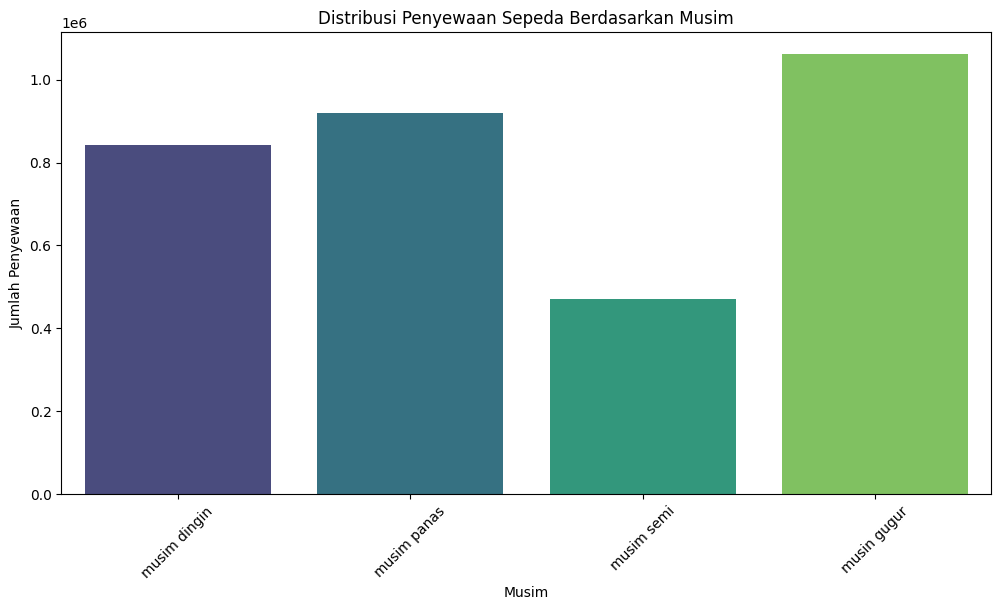

In [406]:
plt.figure(figsize=(12, 6))
sns.barplot(data=summarySeason, x='seasonDesc', y='cnt', palette='viridis')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45) 
plt.show()


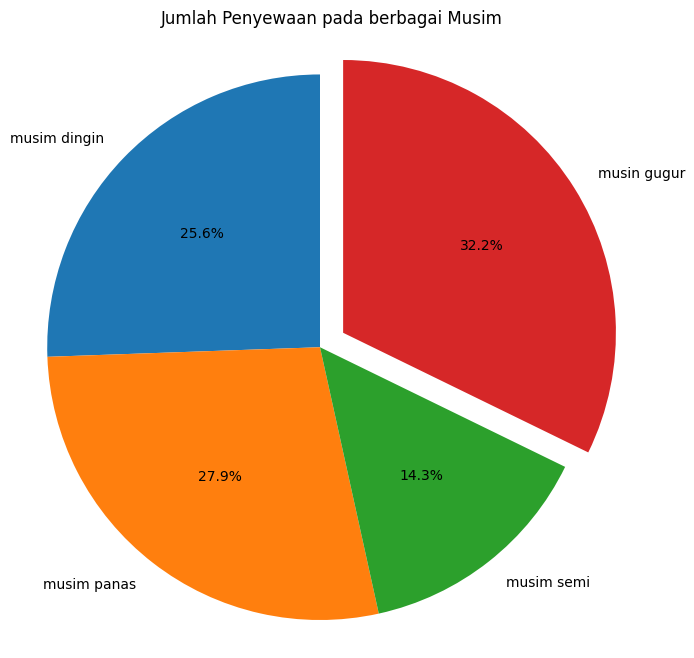

In [407]:
plt.figure(figsize=(8, 8))
plt.pie(summarySeason['cnt'], labels=summarySeason['seasonDesc'], autopct='%1.1f%%', startangle=90, explode=[0.0, 0.0, 0.0, 0.1])
plt.title('Jumlah Penyewaan pada berbagai Musim')
plt.axis('equal')  
plt.show()

##### Visualisasi EDA pertanyaan 4

C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_32092\1622788056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summaryWeather, x='weathersitDesc', y='cnt', palette='viridis')


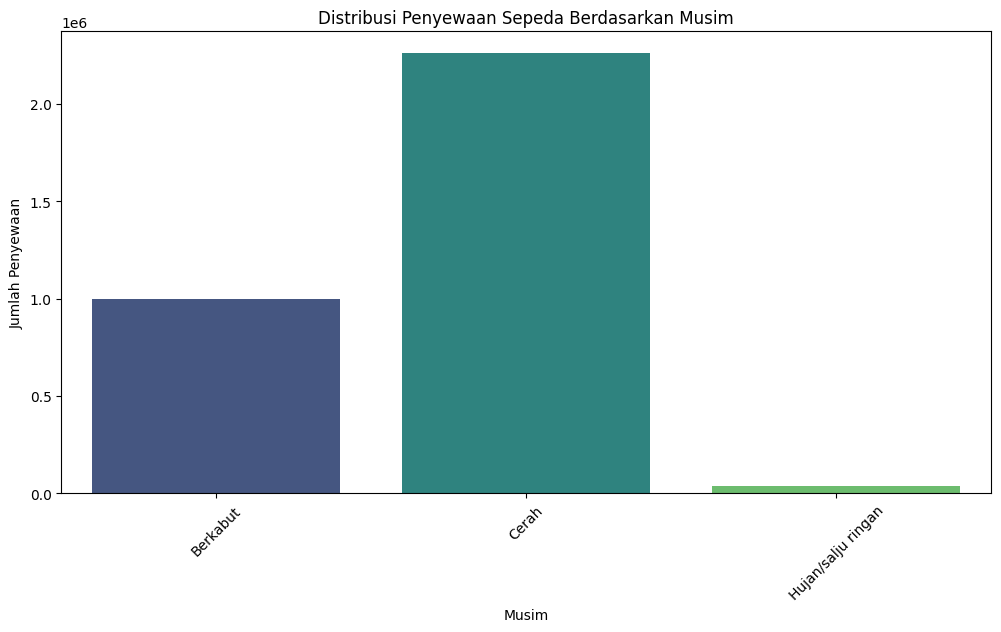

In [408]:
plt.figure(figsize=(12, 6))
sns.barplot(data=summaryWeather, x='weathersitDesc', y='cnt', palette='viridis')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45) 
plt.show()

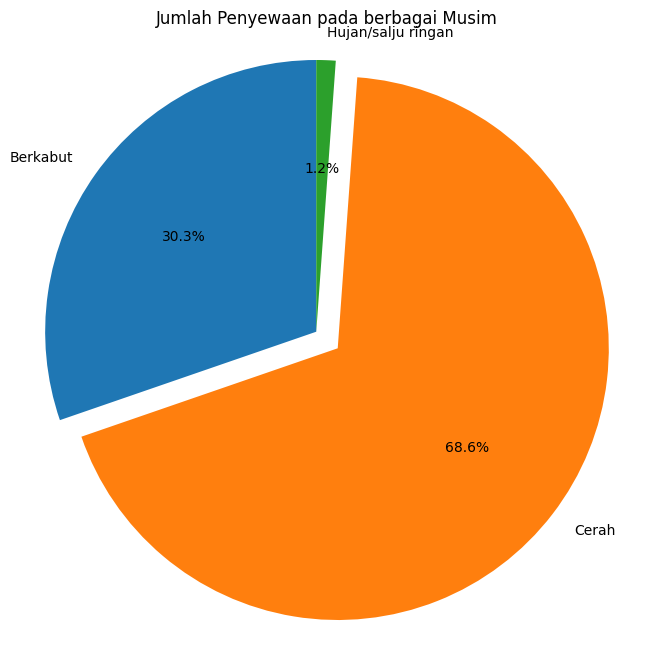

In [409]:
plt.figure(figsize=(8, 8))
plt.pie(summaryWeather['cnt'], labels=summaryWeather['weathersitDesc'], autopct='%1.1f%%', startangle=90, explode=[0.0, 0.1, 0.0])
plt.title('Jumlah Penyewaan pada berbagai Musim')
plt.axis('equal')  
plt.show()

##### Visualisasi EDA pertanyaan 6

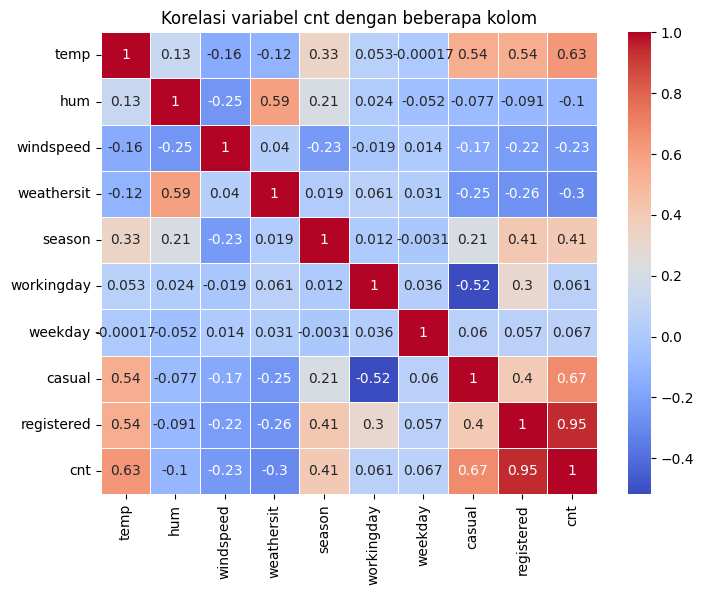

In [410]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi variabel cnt dengan beberapa kolom')
plt.show()

In [411]:
pca = PCA(n_components=3)
features_reduced = pca.fit_transform(features[['temp', 'hum', 'windspeed', 'weathersit', 'season', 'workingday', 'cnt']])

In [412]:
pca_df = pd.DataFrame(features_reduced, columns=['PC1', 'PC2', 'PC3'])
pca_df['cluster'] = clusters

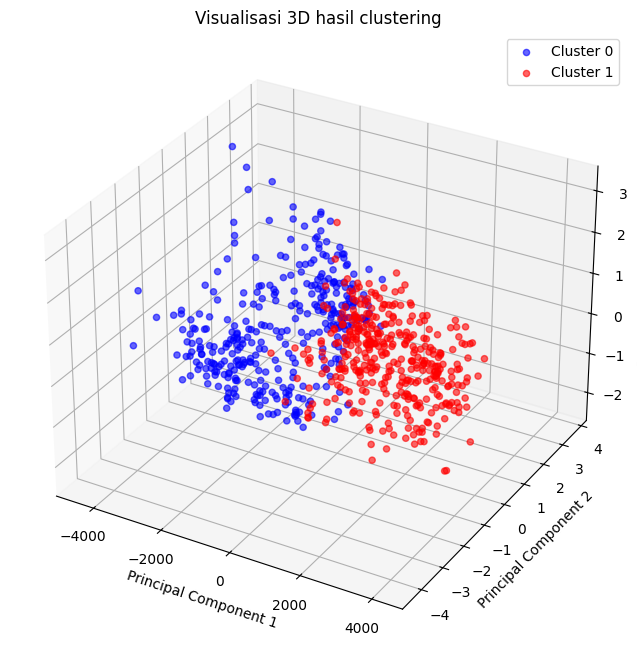

In [413]:
# Membuat visualisasi 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot cluster 0
ax.scatter(pca_df[pca_df['cluster'] == 0]['PC1'],
           pca_df[pca_df['cluster'] == 0]['PC2'],
           pca_df[pca_df['cluster'] == 0]['PC3'],
           c='b', label='Cluster 0', alpha=0.6)

# Plot cluster 1
ax.scatter(pca_df[pca_df['cluster'] == 1]['PC1'],
           pca_df[pca_df['cluster'] == 1]['PC2'],
           pca_df[pca_df['cluster'] == 1]['PC3'],
           c='r', label='Cluster 1', alpha=0.6)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('Visualisasi 3D hasil clustering')
ax.legend()
plt.show()

#### Menjawab pertanyaan Bisnis 2

Bagaimana dampak cuaca terhadap pola penyewaan sepeda secara jam per jam?

Jawaban dari pertanyaan ini dapat diambil dari hasil proses EDA pada sesi sebelumnya, yaitu pada pertanyaan EDA ke 5. Berikut adalah bentuk visualisasi datanya

##### Visualisasi EDA pertanyaan 5

C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_32092\3982840015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summaryHour, x='waktu', y='cnt', palette='viridis')


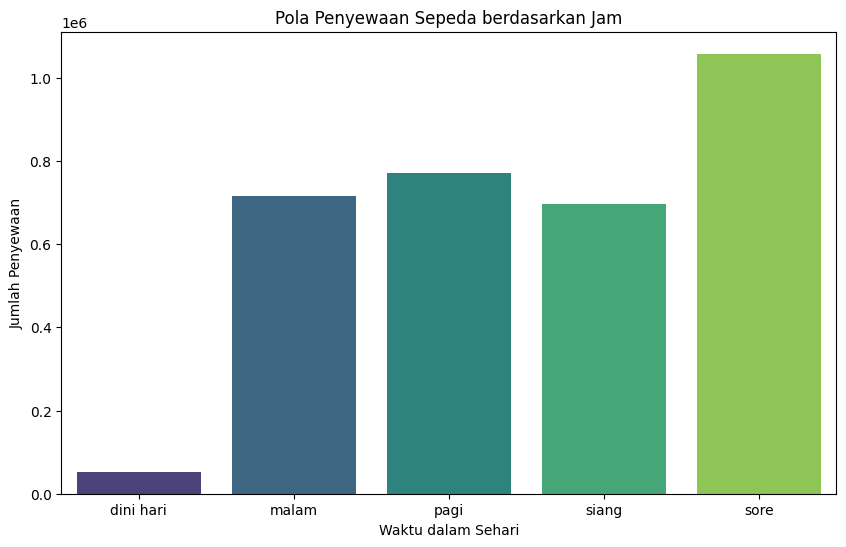

In [414]:
plt.figure(figsize=(10, 6))
sns.barplot(data=summaryHour, x='waktu', y='cnt', palette='viridis')
plt.title('Pola Penyewaan Sepeda berdasarkan Jam')
plt.xlabel('Waktu dalam Sehari')
plt.ylabel('Jumlah Penyewaan')
plt.show()

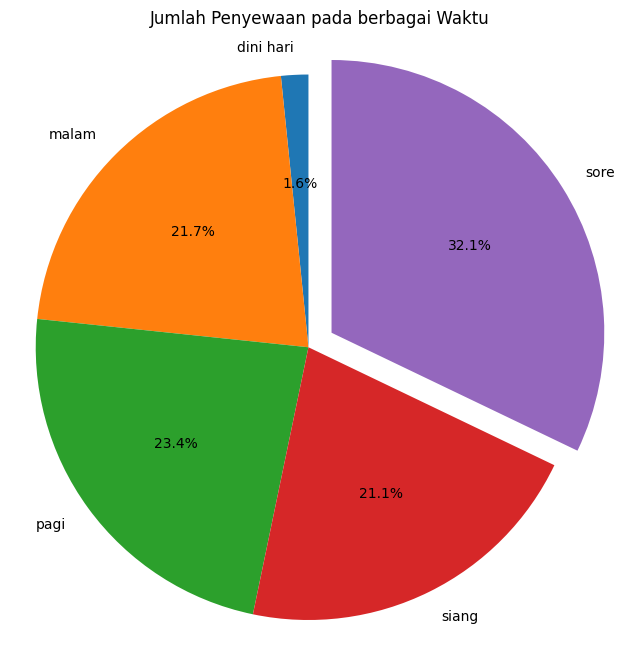

In [415]:
plt.figure(figsize=(8, 8))
plt.pie(summaryHour['cnt'], labels=summaryHour['waktu'], autopct='%1.1f%%', startangle=90, explode=[0.0, 0.0, 0.0, 0.0, 0.1])
plt.title('Jumlah Penyewaan pada berbagai Waktu')
plt.axis('equal')  
plt.show()

## Kesimpulan

**Pertanyaan 1 : Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda harian secara keseluruhan, dan bagaimana kondisi cuaca serta waktu mempengaruhi pola penyewaan?**

>> Berdasarkan analisis faktor utama yang mempengaruhi jumlah penyewaan sepeda harian **meliputi suhu, kelembapan, kondisi cuaca, musim, dan hari kerja atau hari libur**
>>> - Suhu merupakan faktor paling signifikan yang mempengaruhi penyewaan sepeda. Suhu yang lebih hangat (musim panas dan gugur) cenderung meningkatkan jumlah penyewaan sepeda, dengan penyewaan tertinggi tercatat pada suhu panas.

>>> - Kondisi cuaca memainkan peran penting dalam mempengaruhi pola penyewaan sepeda. Hari-hari dengan cuaca cerah menghasilkan penyewaan tertinggi, sementara cuaca buruk seperti hujan atau salju ringan menyebabkan penurunan tajam dalam jumlah penyewaan.

>>> - Musim juga berperan besar. Penyewaan tertinggi terjadi pada musim gugur, diikuti oleh musim panas. Penyewaan terendah terjadi pada musim semi, yang berhubungan dengan suhu yang lebih rendah dan kondisi cuaca yang kurang ideal.

>>> - Hari kerja vs. hari libur: Meskipun total penyewaan lebih tinggi pada hari kerja, rata-rata penyewaan per harinya tidak menunjukkan perbedaan signifikan dengan hari libur, yang menunjukkan bahwa sepeda digunakan baik untuk kebutuhan komuter di hari kerja maupun untuk rekreasi di hari libur.

>> Secara keseluruhan, **suhu hangat, cuaca cerah, dan musim panas/gugur** adalah faktor-faktor utama yang meningkatkan penyewaan sepeda, sementara suhu dingin, kelembapan tinggi, angin kencang, dan cuaca buruk mengurangi minat untuk menyewa sepeda.

**Pertanyaan 2 : Bagaimana dampak cuaca terhadap pola penyewaan sepeda secara jam per jam?**

>> Penyewaan sepeda secara jam per jam menunjukkan pola yang terkait erat dengan **waktu dan kondisi cuaca**
>>> - Waktu dalam sehari: Penyewaan sepeda *tertinggi* terjadi pada *sore hari*, diikuti oleh pagi hari. Pola ini kemungkinan besar terkait dengan aktivitas komuter, seperti pulang dan pergi bekerja. Siang hari juga menunjukkan tingkat penyewaan yang tinggi, terutama untuk kegiatan rekreasi. Penyewaan sepeda menurun drastis pada dini hari, menunjukkan bahwa waktu tersebut bukanlah jam aktif bagi pengguna sepeda.

>>> - Pengaruh Cuaca pada Waktu: Kondisi cuaca cerah mendorong peningkatan penyewaan sepeda, terutama pada sore dan pagi hari yang merupakan waktu-waktu tersibuk. Sore hari menjadi waktu paling populer untuk penyewaan sepeda di bawah cuaca cerah.

**catatan tambahan**

dari hasil clustering terdapat beberapa faktor yang dapat menyimpulkan kesimpulan yang lebih mendalam yaitu **Penurunan Penyewaan** dan **Kenaikan Penyewaan** dari hasil analisis dapat di simpulkan bahwa :

- Penurunan Penyewaan : Penurunan terjadi pada hari-hari dengan suhu dingin, kelembapan tinggi, kecepatan angin tinggi, serta kondisi cuaca buruk (berkabut atau berawan). Musim semi lebih sering berhubungan dengan penurunan penyewaan.

- Kenaikan Penyewaan : Kenaikan terjadi pada hari-hari dengan suhu hangat, kelembapan rendah, dan kecepatan angin yang rendah, terutama di musim panas dan gugur. Kondisi cuaca cerah secara signifikan meningkatkan jumlah penyewaan.

**Rekomendasi**

>> - Fokuskan promosi pada musim panas dan gugur serta pada hari-hari dengan cuaca cerah. Tawarkan diskon atau paket promosi pada musim semi untuk meningkatkan penyewaan meskipun cuaca kurang mendukung.
>> - Pertimbangkan menempatkan lebih banyak sepeda di area-area strategis seperti perkantoran atau dekat transportasi umum pada pagi dan sore hari untuk memaksimalkan penggunaan selama jam sibuk.
>> - Pada kondisi cuaca yang kurang mendukung, pertimbangkan memberikan insentif seperti potongan harga, perlengkapan seperti jas hujan, atau menyediakan rute yang lebih terlindungi dari angin, untuk menarik lebih banyak penyewa.